<a id="Introduction"></a> <br>


### Introduction:
<h2>Context</h2>
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

<h2>Content</h2>
The selected attributes are:

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>


### 2. Libraries

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the data
dataFrameCredit = pd.read_csv("german_credit_data.csv")

<a id="Known"></a> <br>
# **3. First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [123]:
#Searching for Missing data and also checking the shape of data

dataFrameCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [124]:
#Checking unique values
dataFrameCredit.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [125]:
dataFrameCredit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# **4. Some explorations:** <a id="Explorations"></a> <br>

- Starting by distribuition of column Age.
- Some Seaborn graphical
- Columns crossing



<h2>Let's start looking through target variable and their distribuition</h2>

In [126]:
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls
import warnings
from collections import Counter

trace0 = go.Bar(
            x = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [127]:
df_good = dataFrameCredit.loc[dataFrameCredit["Risk"] == 'good']['Age'].values.tolist()
df_bad = dataFrameCredit.loc[dataFrameCredit["Risk"] == 'bad']['Age'].values.tolist()
df_age = dataFrameCredit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



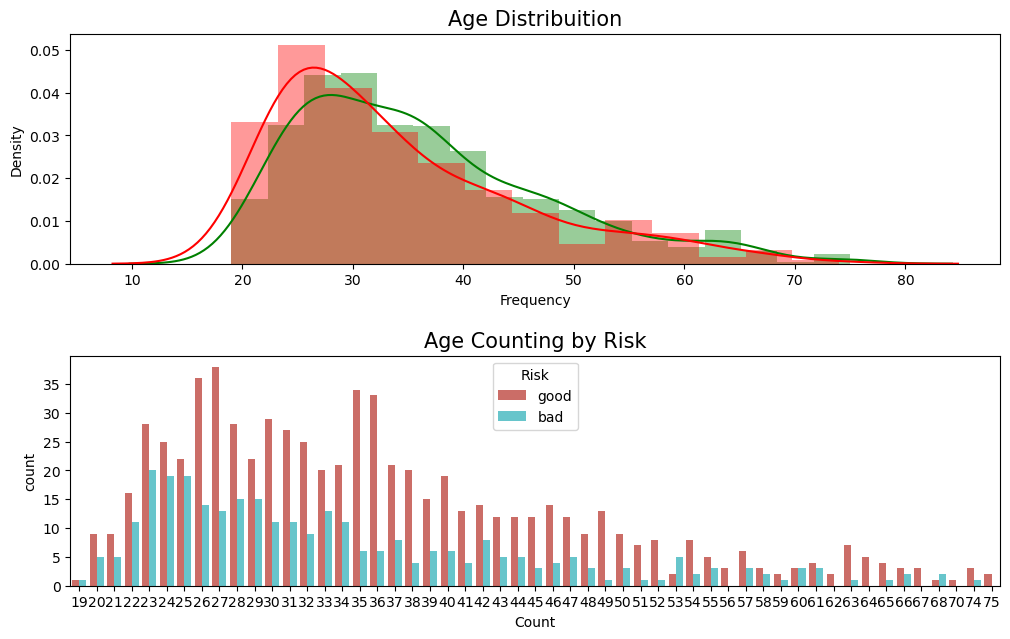

In [128]:
df_good = dataFrameCredit[dataFrameCredit["Risk"] == 'good']
df_bad = dataFrameCredit[dataFrameCredit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=dataFrameCredit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

<h2>Creating an categorical variable to handle with the Age variable </h2>

In [129]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
dataFrameCredit["Age_cat"] = pd.cut(dataFrameCredit.Age, interval, labels=cats)


df_good = dataFrameCredit[dataFrameCredit["Risk"] == 'good']
df_bad = dataFrameCredit[dataFrameCredit["Risk"] == 'bad']

In [130]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [131]:
#First plot
trace0 = go.Bar(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

we can see that the own and good risk have a high correlation

<h3>Distribuition of Credit Amount by Housing</h3>

In [132]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

Highest values come from category "free" and we have a different distribution by Risk

<h2>Looking the diference by Sex</h2>

In [133]:
#First plot
trace0 = go.Bar(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Sex"],
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Sex"],
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<b> How can I set the boxplots in different places? how can I use the same legend to both graphs?</b>

Creating categories of Age and looking the distribution of Credit Amount by Risk


Some explorations through the Job
- Distribuition
- Crossed by Credit amount
- Crossed by Age

In [134]:
#First plot
trace0 = go.Bar(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [135]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [136]:

fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

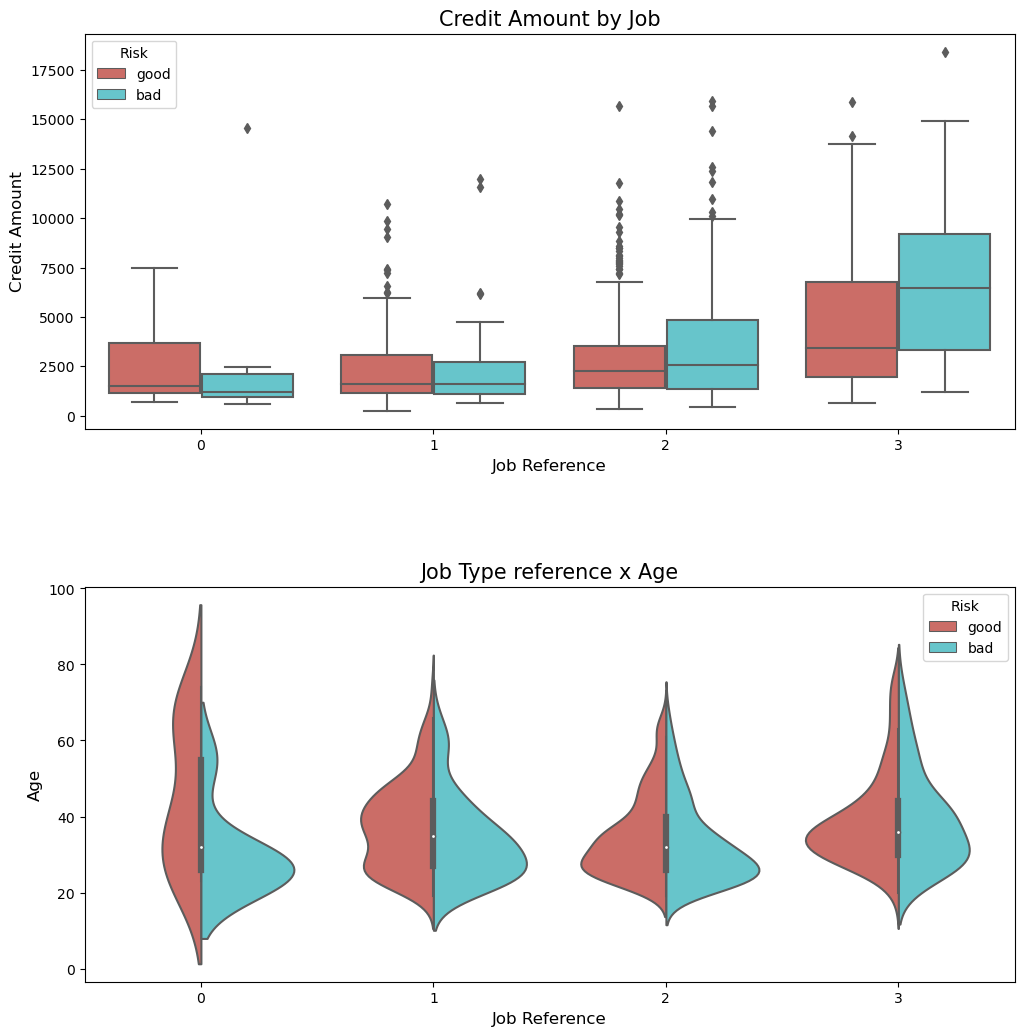

In [137]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=dataFrameCredit, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=dataFrameCredit, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Looking the distribuition of Credit Amount

In [138]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



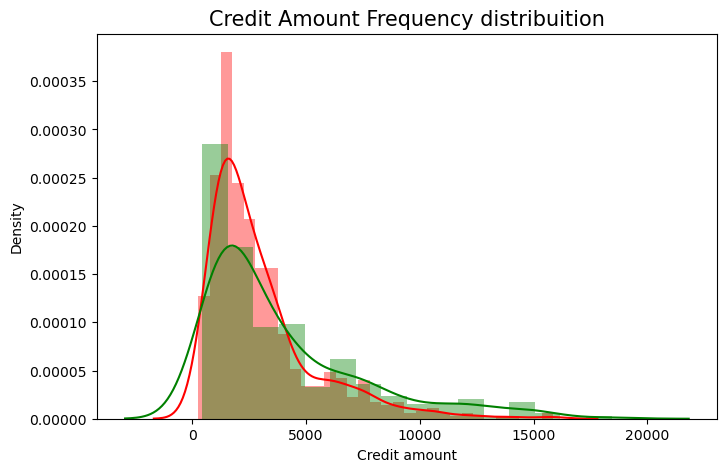

In [139]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Credit amount'], color='r')
g = sns.distplot(df_bad["Credit amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

Distruibution of Saving accounts by Risk

In [140]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')


/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



How can I better configure the legends?  I am trying to substitute the graph below, so how can I use the violinplot on subplots of plotly?

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


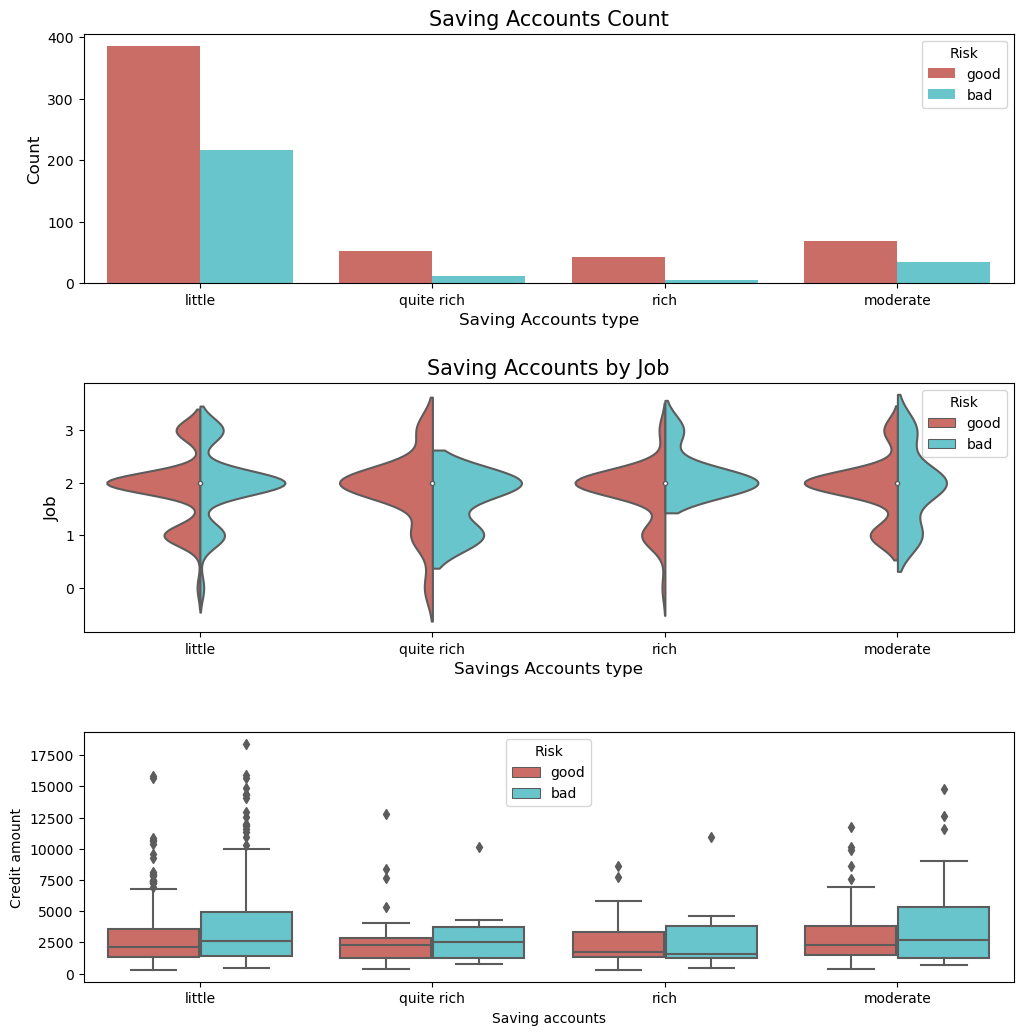

In [141]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(dataFrameCredit["Saving accounts"],dataFrameCredit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=dataFrameCredit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=dataFrameCredit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=dataFrameCredit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Pretty and interesting distribution...

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


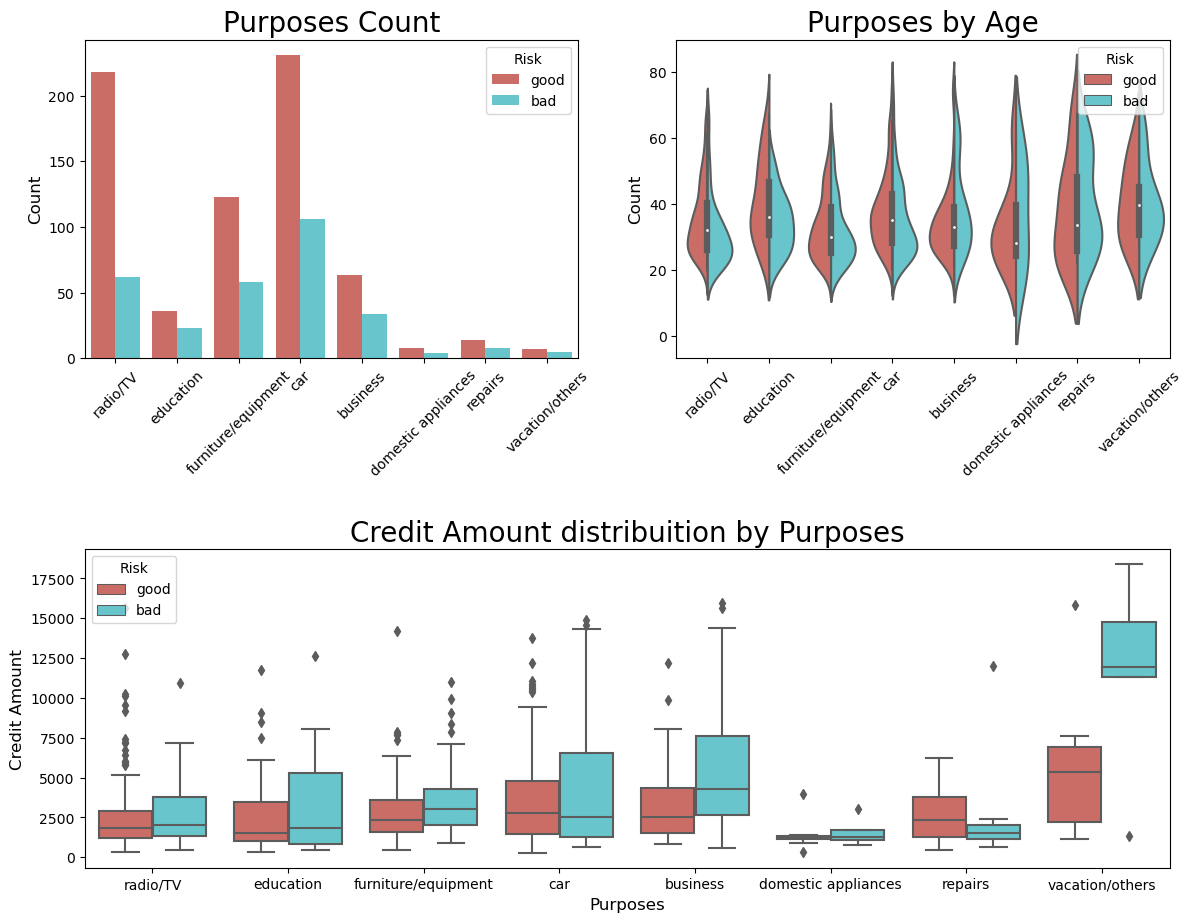

In [142]:
print("Values describe: ")
print(pd.crosstab(dataFrameCredit.Purpose, dataFrameCredit.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=dataFrameCredit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=dataFrameCredit, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=dataFrameCredit, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Duration of the loans distribuition and density

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



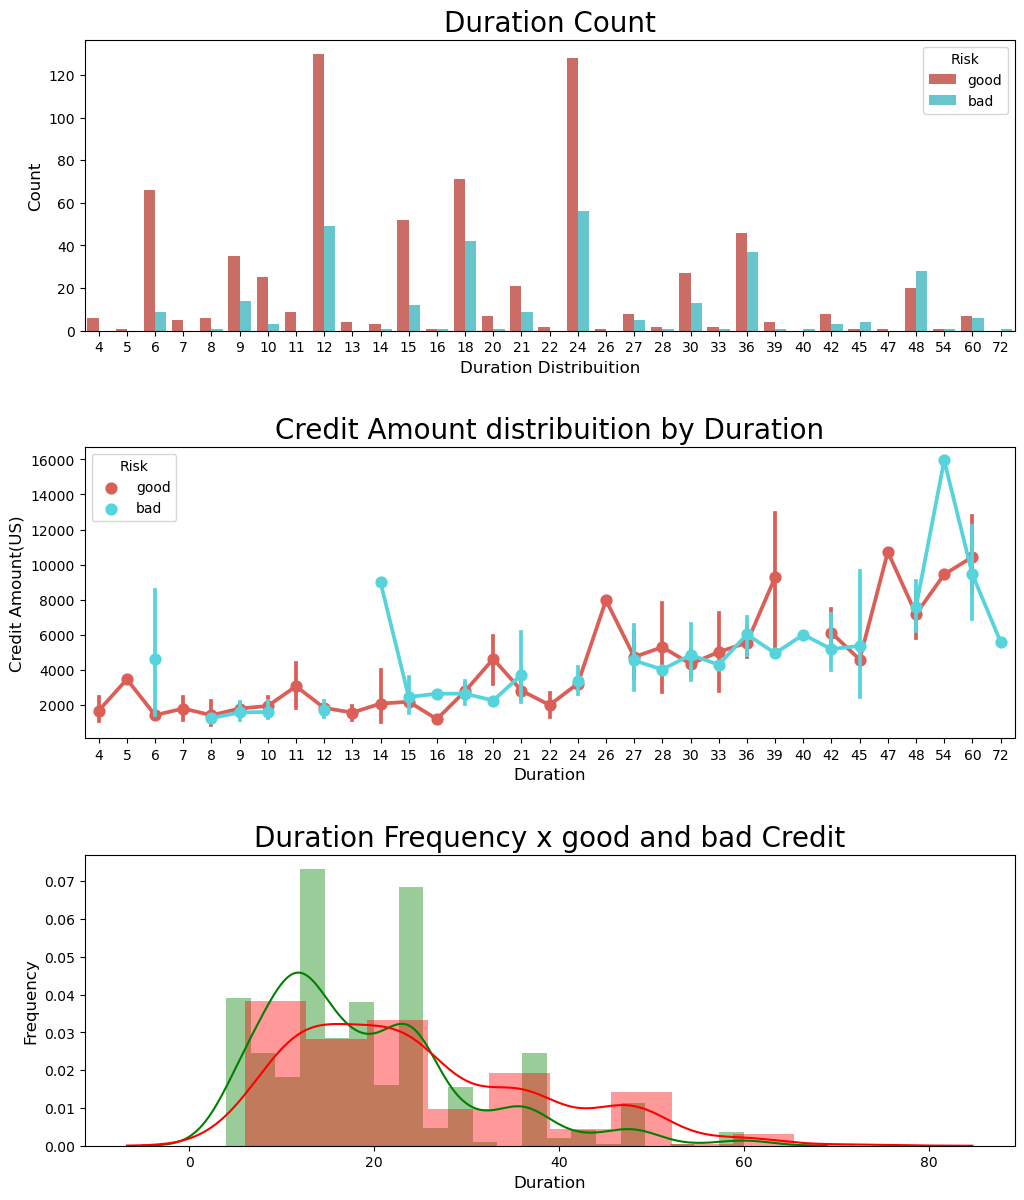

In [143]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=dataFrameCredit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=dataFrameCredit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()


Interesting, we can see that the highest duration have the high amounts. <br>
The highest density is between [12 ~ 18 ~ 24] months<br>
It all make sense.


<h2> Checking Account variable </h2>

First, let's look the distribuition 

In [144]:
#First plot
trace0 = go.Bar(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = dataFrameCredit[dataFrameCredit["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

Now, we will verify the values through Checking Accounts

In [145]:
df_good = dataFrameCredit[dataFrameCredit["Risk"] == 'good']
df_bad = dataFrameCredit[dataFrameCredit["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

The old plot that I am trying to substitute with interactive plots

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


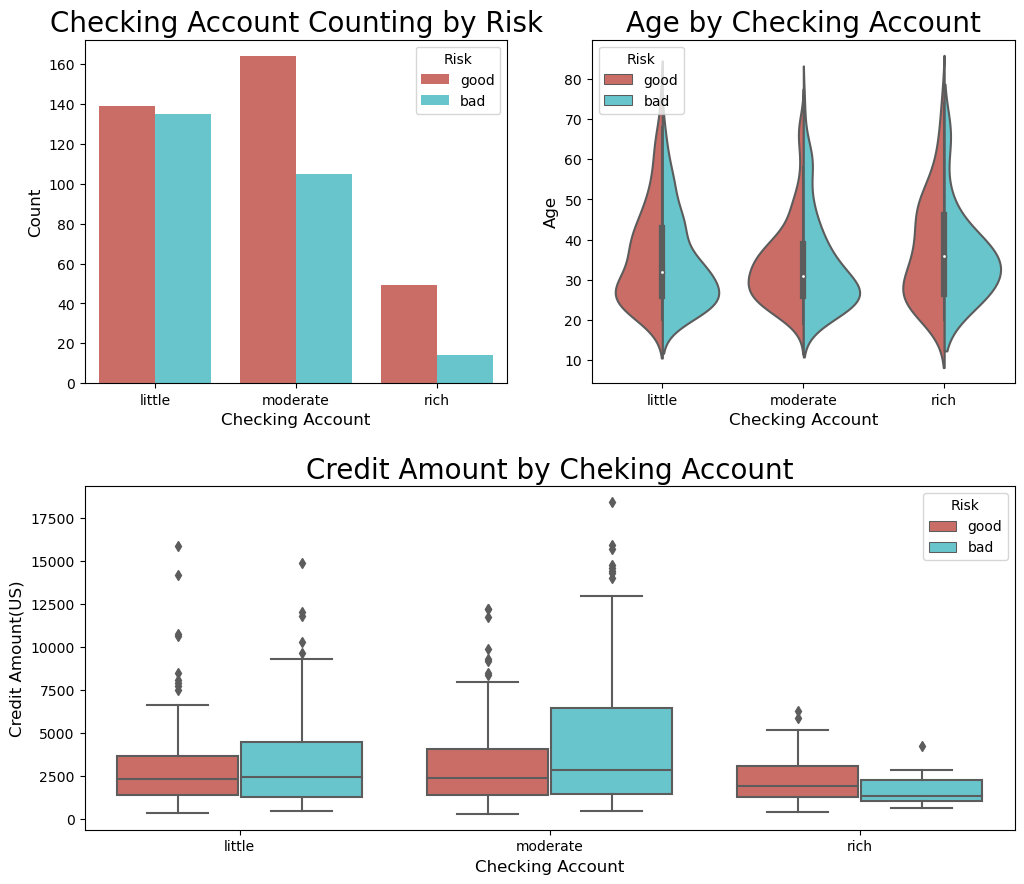

In [146]:
print("Total values of the most missing variable: ")
print(dataFrameCredit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=dataFrameCredit, 
              palette="hls", hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=dataFrameCredit, palette="hls", hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=dataFrameCredit,hue='Risk',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

Crosstab session and anothers to explore our data by another metrics a little deep

In [147]:
print(pd.crosstab(dataFrameCredit.Sex, dataFrameCredit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


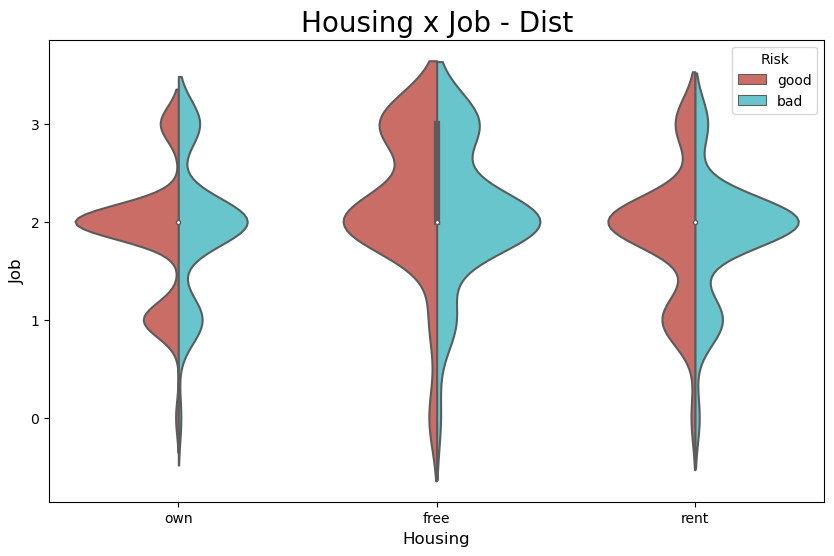

In [148]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=dataFrameCredit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [152]:
print(pd.crosstab(dataFrameCredit["Checking account"],dataFrameCredit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [158]:
# !pip install Jinja2

date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
# pd.crosstab(dataFrameCredit[date_int[0]], dataFrameCredit[date_int[1]]).style.background_gradient(cmap = cm)

## Looking the total of values in each categorical feature

In [109]:
print("Purpose --- ",dataFrameCredit.Purpose.unique())
print("\nSex --- ",dataFrameCredit.Sex.unique())
print("\nHousing --- ",dataFrameCredit.Housing.unique())
print("\nSaving accounts --- ",dataFrameCredit['Saving accounts'].unique())
print("\nRisk --- ",dataFrameCredit['Risk'].unique())
print("\nChecking account --- ",dataFrameCredit['Checking account'].unique())
print("\nAget_cat --- ",dataFrameCredit['Age_cat'].unique())

Purpose ---  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']

Sex ---  ['male' 'female']

Housing ---  ['own' 'free' 'rent']

Saving accounts ---  [nan 'little' 'quite rich' 'rich' 'moderate']

Risk ---  ['good' 'bad']

Checking account ---  ['little' 'moderate' nan 'rich']

Aget_cat ---  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


## Let's do some feature engineering on this values and create variable Dummies of the values

In [110]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [159]:
dataFrameCredit['Saving accounts'] = dataFrameCredit['Saving accounts'].fillna('no_inf')
dataFrameCredit['Checking account'] = dataFrameCredit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
dataFrameCredit = dataFrameCredit.merge(pd.get_dummies(dataFrameCredit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
dataFrameCredit = dataFrameCredit.merge(pd.get_dummies(dataFrameCredit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
dataFrameCredit = dataFrameCredit.merge(pd.get_dummies(dataFrameCredit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
dataFrameCredit = dataFrameCredit.merge(pd.get_dummies(dataFrameCredit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
dataFrameCredit = dataFrameCredit.merge(pd.get_dummies(dataFrameCredit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
dataFrameCredit = dataFrameCredit.merge(pd.get_dummies(dataFrameCredit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
dataFrameCredit = dataFrameCredit.merge(pd.get_dummies(dataFrameCredit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [160]:
#Excluding the missing columns
del dataFrameCredit["Saving accounts"]
del dataFrameCredit["Checking account"]
del dataFrameCredit["Purpose"]
del dataFrameCredit["Sex"]
del dataFrameCredit["Housing"]
del dataFrameCredit["Age_cat"]
del dataFrameCredit["Risk"]
del dataFrameCredit['Risk_good']

# **5. Correlation:** <a id="Correlation"></a> <br>
- Looking the data correlation
<h1>Looking the correlation of the data

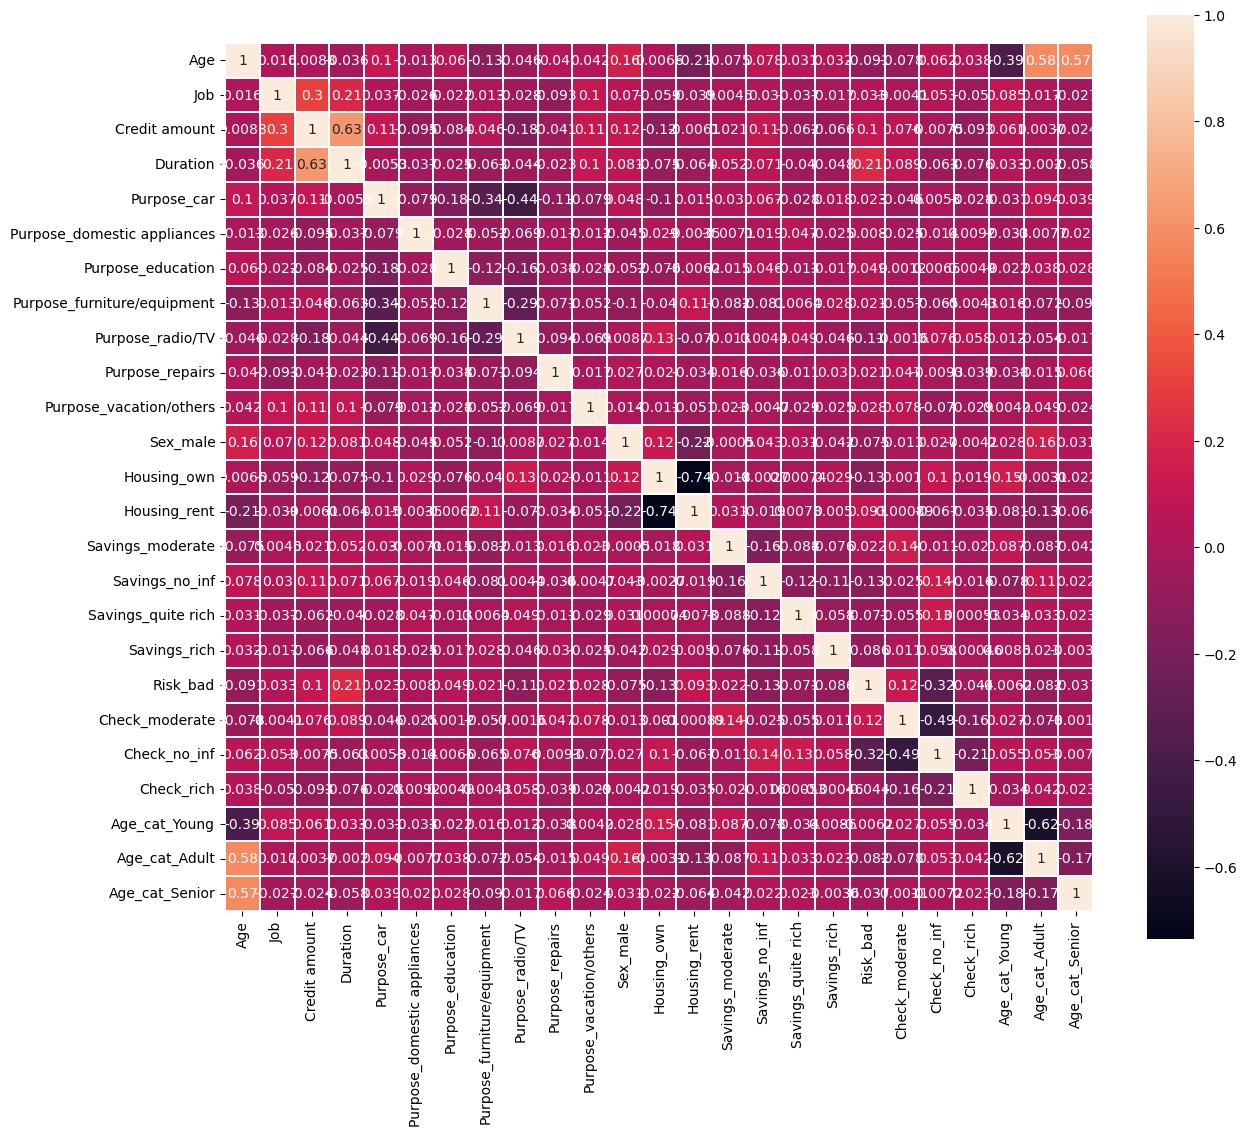

In [161]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# **6. Preprocessing:** <a id="Preprocessing"></a> <br>
- Importing ML librarys
- Setting X and y variables to the prediction
- Splitting Data


In [162]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [164]:
dataFrameCredit['Credit amount'] = np.log(dataFrameCredit['Credit amount'])

In [165]:
#Creating the X and y variables
X = dataFrameCredit.drop('Risk_bad', 1).values
y = dataFrameCredit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

/var/folders/jl/7qsj0h7501d0zj2ssnkwsk5c0000gn/T/ipykernel_41445/688281683.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

LR: 0.400784 (0.083004)
LDA: 0.425367 (0.097996)
KNN: 0.278419 (0.053411)
CART: 0.542897 (0.103999)
NB: 0.593956 (0.073873)


/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/Users/shivanibajaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

RF: 0.382867 (0.080986)
SVM: 0.185933 (0.082906)
XGB: 0.471753 (0.132675)


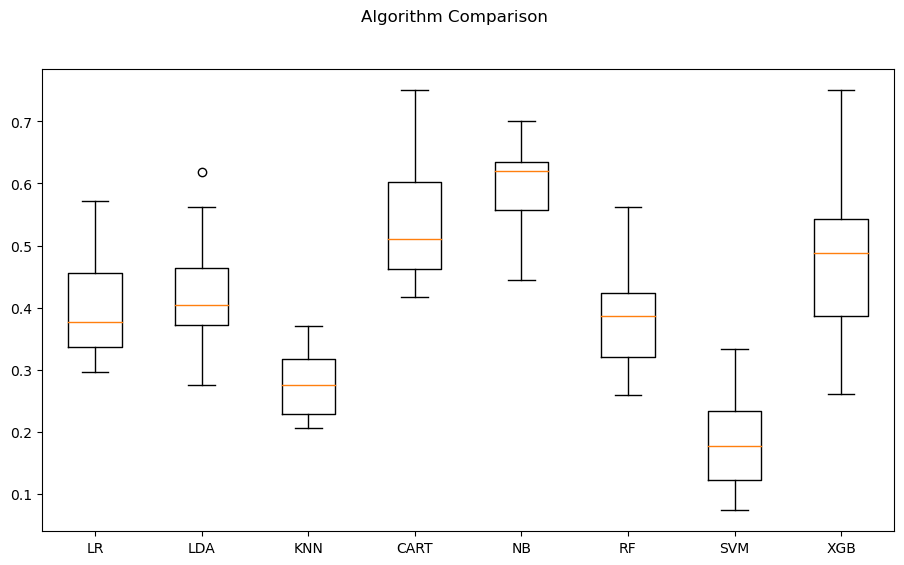

In [168]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Almost all models shows a low value to recall. 

We can observe that our best results was with CART, NB and XGBoost. 
I will implement some models and try to do a simple Tunning on them

# **7.1 Model 1 :** <a id="Modelling 1"></a> <br>
- Using Random Forest to predictict the credit score 
- Some of Validation Parameters

In [169]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.022 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.111 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.065 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.196 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.087 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.044 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.178 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.152 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.174 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.087 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

[CV 1/5] END max_depth=3, max_features=20, n_estimators=10;, score=0.178 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=20, n_estimators=10;, score=0.356 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=20, n_estimators=10;, score=0.196 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=20, n_estimators=10;, score=0.130 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=20, n_estimators=10;, score=0.217 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=20, n_estimators=25;, score=0.156 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=20, n_estimators=25;, score=0.289 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=20, n_estimators=25;, score=0.239 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=20, n_estimators=25;, score=0.174 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=20, n_estimators=25;, score=0.217 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=20, n_estimators=50;, score=0.178 total t

[CV 1/5] END max_depth=5, max_features=15, n_estimators=10;, score=0.222 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=15, n_estimators=10;, score=0.378 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=15, n_estimators=10;, score=0.370 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=15, n_estimators=10;, score=0.261 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=15, n_estimators=10;, score=0.413 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=15, n_estimators=25;, score=0.222 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=15, n_estimators=25;, score=0.378 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=15, n_estimators=25;, score=0.304 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=15, n_estimators=25;, score=0.304 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=15, n_estimators=25;, score=0.370 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=15, n_estimators=50;, score=0.267 total t

[CV 2/5] END max_depth=7, max_features=7, n_estimators=10;, score=0.311 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=7, n_estimators=10;, score=0.348 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=7, n_estimators=10;, score=0.304 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=7, n_estimators=10;, score=0.348 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=7, n_estimators=25;, score=0.267 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=7, n_estimators=25;, score=0.333 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=7, n_estimators=25;, score=0.326 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=7, n_estimators=25;, score=0.326 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=7, n_estimators=25;, score=0.326 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=7, n_estimators=50;, score=0.267 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=7, n_estimators=50;, score=0.378 total time=   0.1s

[CV 1/5] END max_depth=10, max_features=4, n_estimators=50;, score=0.222 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=4, n_estimators=50;, score=0.422 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=4, n_estimators=50;, score=0.370 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=4, n_estimators=50;, score=0.413 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=4, n_estimators=50;, score=0.391 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=4, n_estimators=150;, score=0.267 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=4, n_estimators=150;, score=0.378 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=4, n_estimators=150;, score=0.413 total time=   0.1s
[CV 4/5] END max_depth=10, max_features=4, n_estimators=150;, score=0.391 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=4, n_estimators=150;, score=0.370 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=7, n_estimators=3;, score=0.356 tot

[CV 2/5] END max_depth=10, max_features=20, n_estimators=50;, score=0.444 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=50;, score=0.478 total time=   0.1s
[CV 4/5] END max_depth=10, max_features=20, n_estimators=50;, score=0.391 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=20, n_estimators=50;, score=0.522 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=20, n_estimators=150;, score=0.378 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=20, n_estimators=150;, score=0.422 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=150;, score=0.500 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=20, n_estimators=150;, score=0.391 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=20, n_estimators=150;, score=0.478 total time=   0.2s
[CV 1/5] END max_depth=None, max_features=4, n_estimators=3;, score=0.267 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=4, n_estimators=3;, sco

[CV 2/5] END max_depth=None, max_features=15, n_estimators=50;, score=0.444 total time=   0.1s
[CV 3/5] END max_depth=None, max_features=15, n_estimators=50;, score=0.435 total time=   0.1s
[CV 4/5] END max_depth=None, max_features=15, n_estimators=50;, score=0.326 total time=   0.1s
[CV 5/5] END max_depth=None, max_features=15, n_estimators=50;, score=0.522 total time=   0.1s
[CV 1/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.378 total time=   0.2s
[CV 2/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.422 total time=   0.2s
[CV 3/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.478 total time=   0.2s
[CV 4/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.413 total time=   0.2s
[CV 5/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.543 total time=   0.2s
[CV 1/5] END max_depth=None, max_features=20, n_estimators=3;, score=0.489 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=20, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [170]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.508792270531401
{'max_depth': None, 'max_features': 20, 'n_estimators': 3}


In [171]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [172]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.736


[[158  20]
 [ 46  26]]


0.3892215568862275


# **7.2 Model 2:** <a id="Modelling 2"></a> <br>

In [174]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [175]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [176]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.7013333333333334


In [177]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.652


[[125  53]
 [ 34  38]]


              precision    recall  f1-score   support

           0       0.79      0.70      0.74       178
           1       0.42      0.53      0.47        72

    accuracy                           0.65       250
   macro avg       0.60      0.62      0.60       250
weighted avg       0.68      0.65      0.66       250



With the Gaussian Model we got a best recall. 

## Let's verify the ROC curve

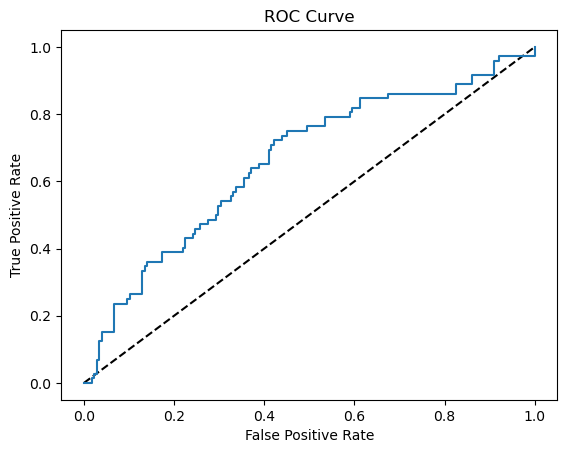

In [178]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [179]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [182]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.6946666666666667


In [183]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.7


[[144  34]
 [ 41  31]]


0.4390934844192635


## Implementing a pipeline of models 

In [184]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [185]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.85,
 'gamma': 0.2,
 'max_depth': 5,
 'min_child_weight': 3,
 'subsample': 0.85}

In [186]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.732


[[150  28]
 [ 39  33]]


How can I avoid this error? 

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
